In [2]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


TASK 1

In [3]:
#TASK 1
data = pd.read_csv('WISDM_.csv')
print(data.head())
print(data.info())
print(data.isnull().sum()) # prints sum of missing values in col
data = data.dropna(subset=['X', 'Y', 'Z'])  # since missing are in X , Y , Z only so drop them

data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['User_ID'] = data['User_ID'].astype('category')
data['Z'] = data['Z'].str.replace(r'[^\d.-]+', '', regex=True)
data['Z'] = data['Z'].str.replace(';', '', regex=False) # Remove semicolons from 'Z' column

data['X'] = data['X'].astype(float)
data['Y'] = data['Y'].astype(float)
data['Z'] = data['Z'].astype(float)

data = data.dropna(subset=['X', 'Y', 'Z'])

print(data.dtypes)
print(data.isnull().sum())

# z - score normalization = [ x - mean ] / [ std dev ]
columns = ['X', 'Y', 'Z'] # Select the columns to normalize
for col in columns:
    data[col] = (data[col] - data[col].mean()) / data[col].std()
print(data[columns].head())

   User_ID Activity_Label       Timestamp         X          Y             Z
0       33        Jogging  49105962326000 -0.694638  12.680544   0.50395286;
1       33        Jogging  49106062271000  5.012288  11.264028   0.95342433;
2       33        Jogging  49106112167000  4.903325  10.882658  -0.08172209;
3       33        Jogging  49106222305000 -0.612916  18.496431    3.0237172;
4       33        Jogging  49106332290000 -1.184970  12.108489     7.205164;
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063922 entries, 0 to 1063921
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   User_ID         1063922 non-null  int64  
 1   Activity_Label  1063922 non-null  object 
 2   Timestamp       1063922 non-null  int64  
 3   X               1063921 non-null  float64
 4   Y               1063921 non-null  float64
 5   Z               1063920 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usa

TASK 2


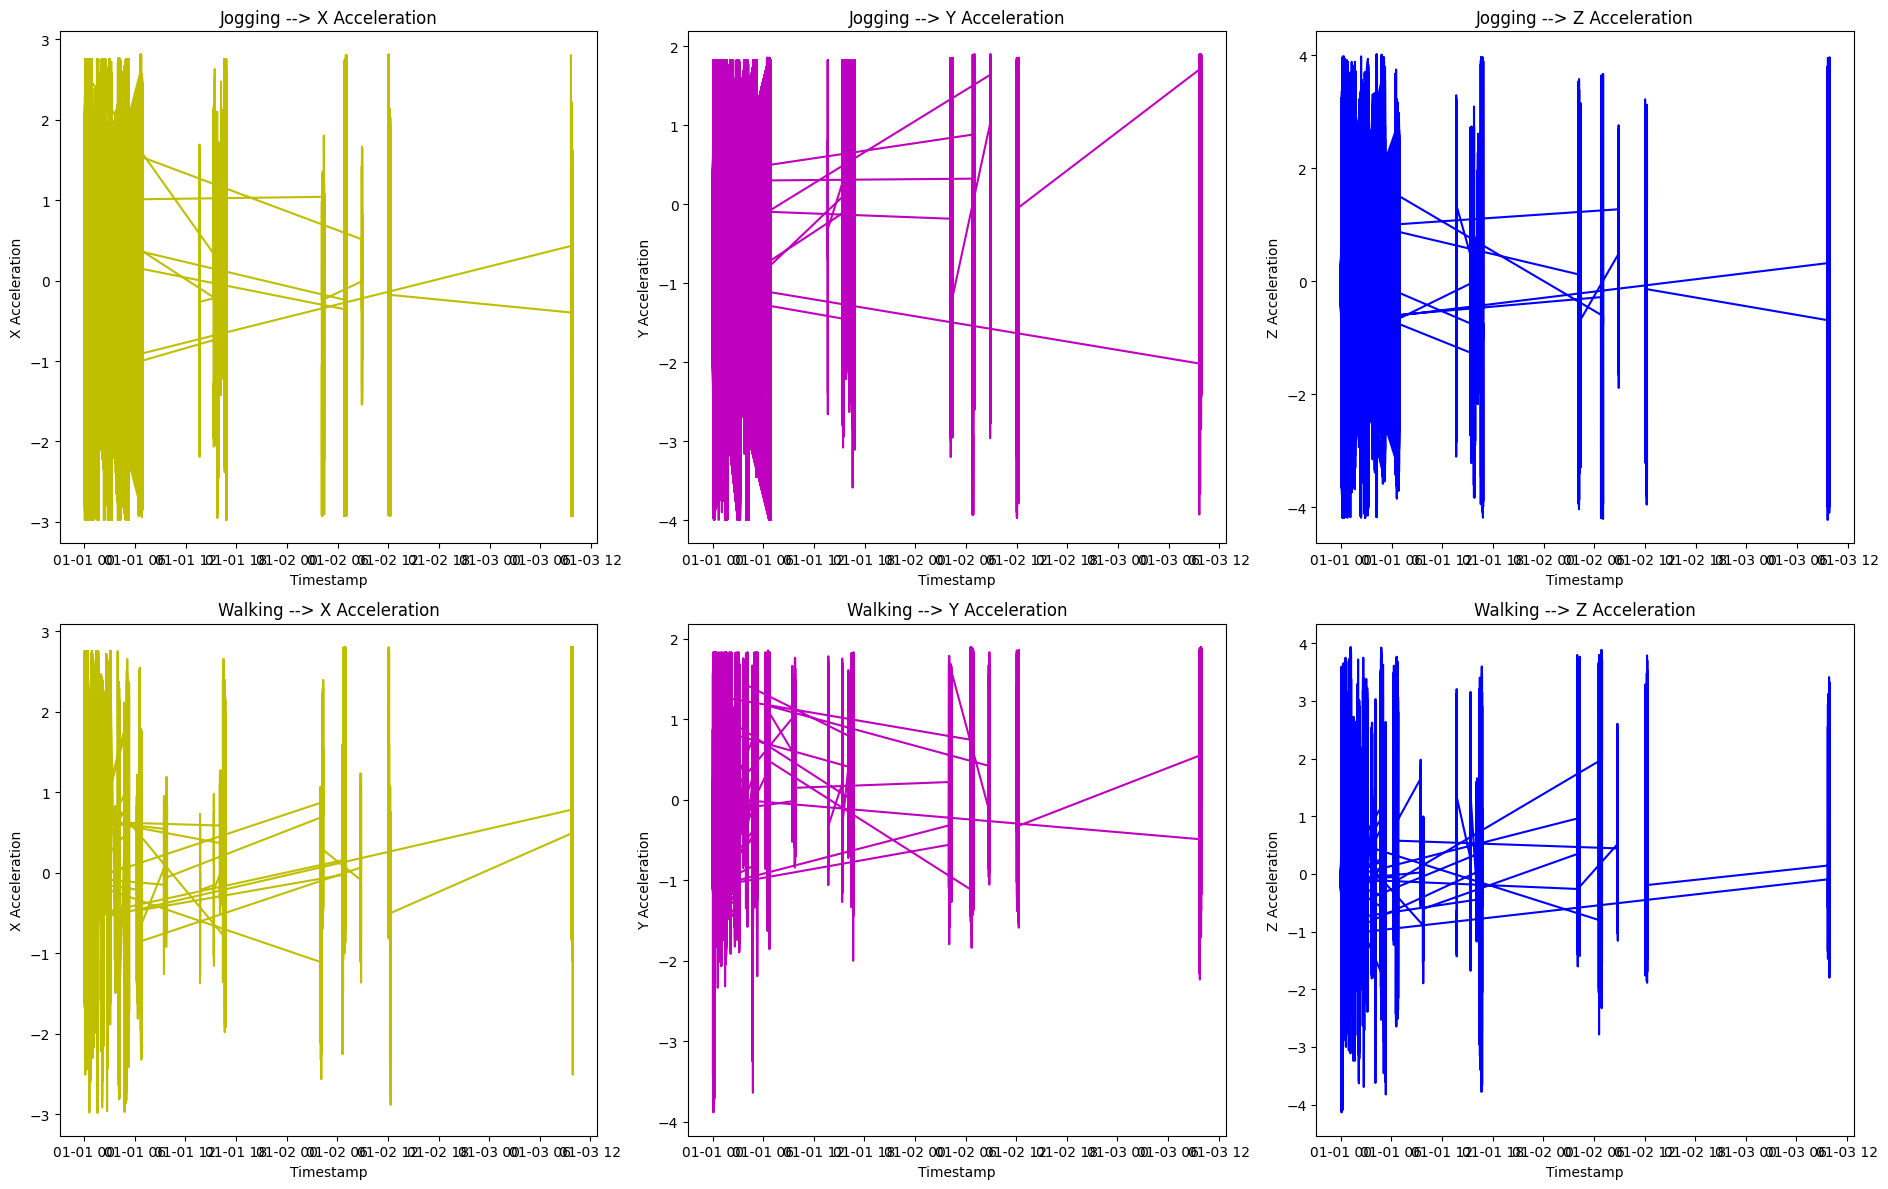

Summary Statistics for Jogging =
               X         Y         Z
mean   -0.124016 -0.266850 -0.114040
median -0.107224 -0.400119 -0.148405
std     1.336285  1.368303  1.226703

Summary Statistics for Walking =
               X         Y         Z
mean    0.130225  0.207451 -0.109828
median  0.050802  0.219717 -0.196814
std     0.851602  0.745552  0.841639

Magnitude of Jogging = 
          X         Y         Z  Magnitude
0 -0.208863  0.800987  0.019602   0.828002
1  0.626173  0.590433  0.113571   0.868103
2  0.610229  0.533746 -0.102844   0.817216
3 -0.196905  1.665470  0.546402   1.763836
4 -0.280608  0.715956  1.420607   1.615381

Magnitude of Walking = 
            X         Y         Z  Magnitude
597  0.016338  0.106565  0.497994   0.509530
598  0.056196  0.197670  0.705866   0.735173
599 -0.180962  1.392156  0.187608   1.416348
600  0.594286  0.515525 -0.333497   0.854495
601 -0.113202  0.288775 -0.230985   0.386729


In [4]:
# TASK 2

Jogging = data[data['Activity_Label'] == 'Jogging']
Walking = data[data['Activity_Label'] == 'Walking']

plt.figure(figsize=(19, 12)) # sets a plot with size of 19x12 inch

# Jogging
plt.subplot(2, 3, 1) # grid will have 3 rows , 2 columns , 1 specifies position of subplot in grid
plt.plot(Jogging['Timestamp'], Jogging['X'], label='X-axis', color='y')
plt.title('Jogging --> X Acceleration')
plt.xlabel('Timestamp')
plt.ylabel('X Acceleration')

plt.subplot(2, 3, 2)
plt.plot(Jogging['Timestamp'], Jogging['Y'], label='Y-axis', color='m')
plt.title('Jogging --> Y Acceleration')
plt.xlabel('Timestamp')
plt.ylabel('Y Acceleration')

plt.subplot(2, 3, 3)
plt.plot(Jogging['Timestamp'], Jogging['Z'], label='Z-axis', color='b')
plt.title('Jogging --> Z Acceleration')
plt.xlabel('Timestamp')
plt.ylabel('Z Acceleration')

# Walking
plt.subplot(2, 3, 4)
plt.plot(Walking['Timestamp'], Walking['X'], label='X-axis', color='y')
plt.title('Walking --> X Acceleration')
plt.xlabel('Timestamp')
plt.ylabel('X Acceleration')

plt.subplot(2, 3, 5)
plt.plot(Walking['Timestamp'], Walking['Y'], label='Y-axis', color='m')
plt.title('Walking --> Y Acceleration')
plt.xlabel('Timestamp')
plt.ylabel('Y Acceleration')

plt.subplot(2, 3, 6)
plt.plot(Walking['Timestamp'], Walking['Z'], label='Z-axis', color='b')
plt.title('Walking --> Z Acceleration')
plt.xlabel('Timestamp')
plt.ylabel('Z Acceleration')

plt.tight_layout()
plt.show()

# summary statistics
JoggingStats = Jogging[['X', 'Y', 'Z']].agg(['mean', 'median', 'std'])
WalkingStats = Walking[['X', 'Y', 'Z']].agg(['mean', 'median', 'std'])

print("Summary Statistics for Jogging =")
print(JoggingStats)
print("\nSummary Statistics for Walking =")
print(WalkingStats)

# magnitude as additional feature
# magnitude = sqrt ( x^2 + y^2 + z^2)

Jogging = Jogging.copy() # this guarantees that no modifications to Jogging/Walking will affect original data
Jogging['Magnitude'] = np.sqrt(Jogging['X']**2 + Jogging['Y']**2 + Jogging['Z']**2)
Walking = Walking.copy()
Walking['Magnitude'] = np.sqrt(Walking['X']**2 + Walking['Y']**2 + Walking['Z']**2)


print("\nMagnitude of Jogging = ")
print(Jogging[['X', 'Y', 'Z', 'Magnitude']].head())

print("\nMagnitude of Walking = ")
print(Walking[['X', 'Y', 'Z', 'Magnitude']].head())

TASK 3

In [5]:
# TASK 3
X = data[['X', 'Y', 'Z']] # independent features
Y = data['Activity_Label'] # target var we want to predict

# Splitting
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.2, random_state=42)
# 20% for testing & 80% for training
# 42 --> make sures that same split happens every time

scaler = StandardScaler() # creates scaler obj for standardization
XTrain = scaler.fit_transform(XTrain) # calculates mean & std dev from training set & normalizes training features
XTest = scaler.transform(XTest) # same as above for testing set

BestK = None # stores best # of neighbors.
BestAccuracy = 0

print("Testing KNN model with different values of K : ")
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(XTrain, YTrain) # trains model on training data
    accuracy = knn.score(XTest, YTest) # evaluates model's accuracy on testing data
    print(f"K={k}, Accuracy --> {accuracy:.4f}")
    if accuracy > BestAccuracy:
        BestK = k
        BestAccuracy = accuracy

print(f"\nBest value for K -->{BestK} with Accuracy --> {BestAccuracy:.4f}")

# train final model using best K
knn_final = KNeighborsClassifier(n_neighbors=BestK)
knn_final.fit(XTrain, YTrain)
# evaluate model on test set
y_pred = knn_final.predict(XTest)

print("\nConfusion Matrix:")
print(confusion_matrix(YTest, y_pred))
print("\nClassification Report:")
print(classification_report(YTest, y_pred))


Testing KNN model with different values of K : 
K=1, Accuracy --> 0.5494
K=2, Accuracy --> 0.4999
K=3, Accuracy --> 0.5582
K=4, Accuracy --> 0.5729
K=5, Accuracy --> 0.5817
K=6, Accuracy --> 0.5916
K=7, Accuracy --> 0.6016
K=8, Accuracy --> 0.6062
K=9, Accuracy --> 0.6110
K=10, Accuracy --> 0.6151

Best value for K -->10 with Accuracy --> 0.6151

Confusion Matrix:
[[ 2288  3861    31   388  1545 11324]
 [ 1538 46601   153   142  1272 16567]
 [   20    68 11154    32    34    59]
 [  129    38    19  8212   270   551]
 [ 1771  4876    45   653  2700 13730]
 [ 3616 14115    70   874  4118 59920]]

Classification Report:
              precision    recall  f1-score   support

  Downstairs       0.24      0.12      0.16     19437
     Jogging       0.67      0.70      0.69     66273
     Sitting       0.97      0.98      0.98     11367
    Standing       0.80      0.89      0.84      9219
    Upstairs       0.27      0.11      0.16     23775
     Walking       0.59      0.72      0.65     8

TASK 4

Confusion Matrix:
[[     0   7557   5553      0      0  84701]
 [     0 103433  34201      0      0 193711]
 [     0   1259  41225      0      0  14921]
 [     0    171      5      0      0  46086]
 [     0  11192   8524      0      0  98873]
 [     0  47154  12401      0      0 352953]]


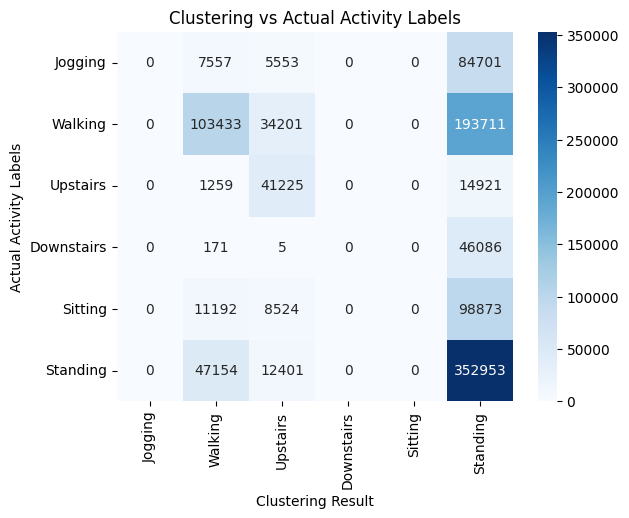

In [9]:
# TASK 4
Clustering = data[['X', 'Y', 'Z']]  # only accelerometer values
k = len(data['Activity_Label'].unique())  # number of unique activity labels
# K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster_Label'] = kmeans.fit_predict(Clustering)

# Map cluster labels to the true labels
mapping = {}
for cluster in range(k):
    cluster_indices = data[data['Cluster_Label'] == cluster].index
    majority_label = data.loc[cluster_indices, 'Activity_Label'].mode()[0]
    mapping[cluster] = majority_label

# convert cluster labels to activity labels
data['Cluster_Label_Mapped'] = data['Cluster_Label'].map(mapping)

# confusion matrix
CONFUSION_MATRIX = confusion_matrix(data['Activity_Label'], data['Cluster_Label_Mapped'])
print("Confusion Matrix:")
print(CONFUSION_MATRIX)

# Plot confusion matrix
sns.heatmap(CONFUSION_MATRIX, annot=True, fmt='d', cmap='Blues',
            xticklabels=data['Activity_Label'].unique(),
            yticklabels=data['Activity_Label'].unique())
plt.title('Clustering vs Actual Activity Labels')
plt.xlabel('Clustering Result')
plt.ylabel('Actual Activity Labels')
plt.show()

# K-Means is an unsupervised learning
# effectiveness of clustering algo such as K-Means/K-Medoids depends on features selected.
# Walking and Jogging data can be properly grouped if appropriate clustering technique is applied.
# However , it may yield inconsistent results if patterns overlap or if characteristics fail to adequately capture the differentiation.